IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PREPROCESSING THE DATA

In [2]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [3]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [9]:
path = "F:/Network Security/Dataset/kddcup.data_10_percent.csv"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [10]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

VISUALIZING THE DATA

In [11]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

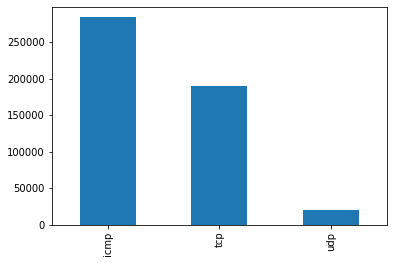

In [12]:
bar_graph('protocol_type')

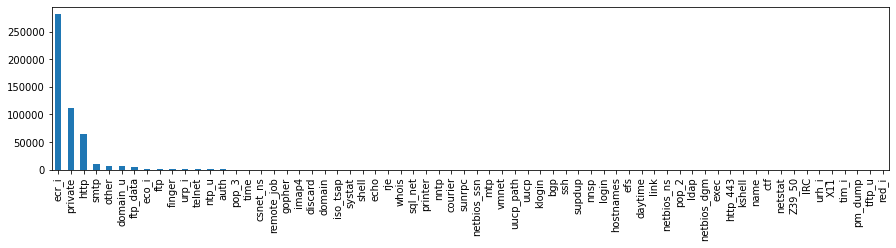

In [13]:
plt.figure(figsize=(15,3))
bar_graph('service')

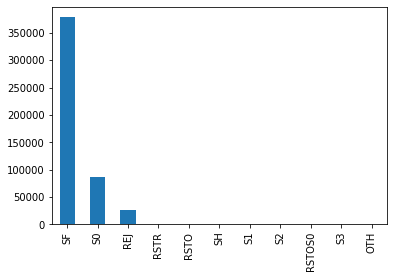

In [14]:
bar_graph('flag')

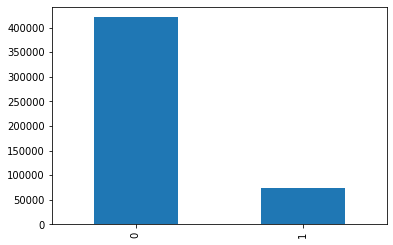

In [15]:
bar_graph('logged_in')

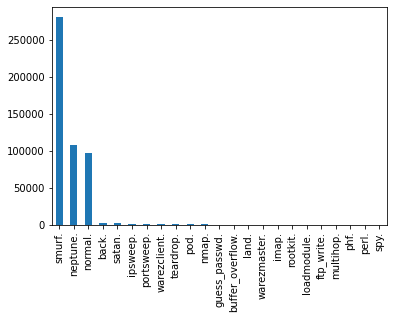

In [16]:
bar_graph('target')

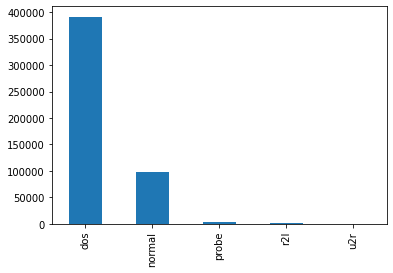

In [17]:
bar_graph('Attack Type')

In [18]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

REMOVING THE HIGHLY CORRELATED COLOUMNS

C:\Users\User\AppData\Local\Temp\ipykernel_15384\4162482413.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN


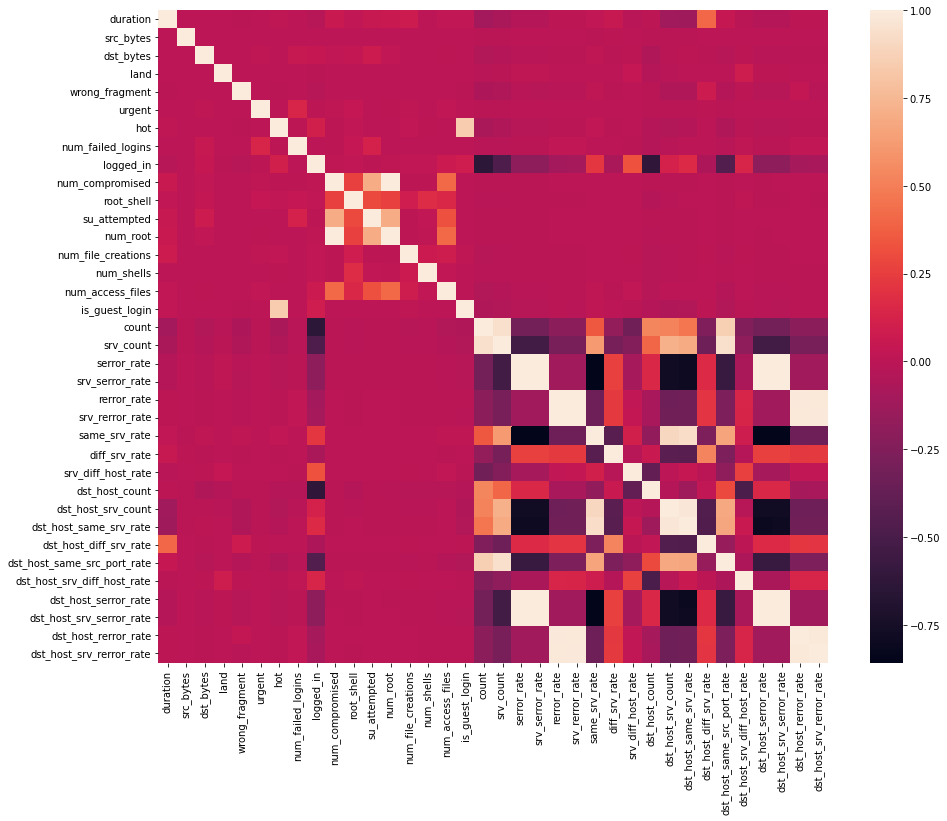

In [20]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [21]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [22]:
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


LABEL ENCODING THE FEATURES

In [23]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [24]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [25]:
#attack type feature mapping
amap = {'dos':0,'normal':1,'probe':2,'r2l':3,'u2r':4}
df['Attack Type'] = df['Attack Type'].map(amap)

In [26]:
df.drop('service',axis = 1,inplace= True)

BUILDING AND TRAINING A NEURAL NETWORK

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

In [29]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


SHALLOW NEURAL NETWORK

In [30]:
shallow_model = Sequential([
    Dense(1024, input_dim=30, activation='relu'),
    Dropout(0.01),
    Dense(5, activation='softmax')
])

In [31]:
shallow_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [33]:
shallow_model.fit(X_train, Y_train.values.ravel(), epochs=15, batch_size=32)

Epoch 1/15
10344/10344 [==============================] - 27s 3ms/step - loss: 0.0030 - accuracy: 0.9992
Epoch 2/15
10344/10344 [==============================] - 29s 3ms/step - loss: 0.0029 - accuracy: 0.9992
Epoch 3/15
10344/10344 [==============================] - 32s 3ms/step - loss: 0.0029 - accuracy: 0.9992
Epoch 4/15
10344/10344 [==============================] - 30s 3ms/step - loss: 0.0029 - accuracy: 0.9992
Epoch 5/15
10344/10344 [==============================] - 28s 3ms/step - loss: 0.0028 - accuracy: 0.9993
Epoch 6/15
10344/10344 [==============================] - 29s 3ms/step - loss: 0.0028 - accuracy: 0.9993
Epoch 7/15
10344/10344 [==============================] - 39s 4ms/step - loss: 0.0027 - accuracy: 0.9993
Epoch 8/15
10344/10344 [==============================] - 31s 3ms/step - loss: 0.0028 - accuracy: 0.9993
Epoch 9/15
10344/10344 [==============================] - 31s 3ms/step - loss: 0.0027 - accuracy: 0.9993
Epoch 10/15
10344/10344 [==============================

DEEP NEURAL NETWORK

In [34]:
deep_model = Sequential([
    Dense(1024, input_dim=30, activation='relu'),
    Dropout(0.01),
    Dense(768, activation='relu'),
    Dropout(0.01),
    Dense(512, activation='relu'),
    Dropout(0.01),
    Dense(256, activation='relu'),
    Dropout(0.01),
    Dense(128, activation='relu'),
    Dropout(0.01),
    Dense(5, activation='softmax')
])

In [35]:
deep_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [36]:
deep_model.fit(X_train, Y_train.values.ravel(), epochs=15, batch_size=32)

Epoch 1/15
10344/10344 [==============================] - 164s 16ms/step - loss: 0.0169 - accuracy: 0.9960
Epoch 2/15
10344/10344 [==============================] - 156s 15ms/step - loss: 0.0078 - accuracy: 0.9982
Epoch 3/15
10344/10344 [==============================] - 155s 15ms/step - loss: 0.0070 - accuracy: 0.9985
Epoch 4/15
10344/10344 [==============================] - 172s 17ms/step - loss: 0.0071 - accuracy: 0.9986
Epoch 5/15
10344/10344 [==============================] - 162s 16ms/step - loss: 0.0063 - accuracy: 0.9987
Epoch 6/15
10344/10344 [==============================] - 169s 16ms/step - loss: 0.0056 - accuracy: 0.9987
Epoch 7/15
10344/10344 [==============================] - 161s 16ms/step - loss: 0.0064 - accuracy: 0.9989
Epoch 8/15
10344/10344 [==============================] - 157s 15ms/step - loss: 0.0056 - accuracy: 0.9988
Epoch 9/15
10344/10344 [==============================] - 155s 15ms/step - loss: 0.0076 - accuracy: 0.9989
Epoch 10/15
10344/10344 [============

CONVOLUTIONAL NEURAL NETWORKS

In [37]:
cnn_model = Sequential([
    Conv1D(64, 3, padding="same", activation="relu", input_shape=(30,1)),
    MaxPooling1D(pool_size=(2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(5, activation="softmax")
])

In [38]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [39]:
cnn_model.fit(X_train.reshape((-1,30,1)), Y_train.values.ravel(), epochs=15, batch_size=32)


Epoch 1/15
10344/10344 [==============================] - 34s 3ms/step - loss: 0.0211 - accuracy: 0.9944
Epoch 2/15
10344/10344 [==============================] - 35s 3ms/step - loss: 0.0089 - accuracy: 0.9976
Epoch 3/15
10344/10344 [==============================] - 34s 3ms/step - loss: 0.0076 - accuracy: 0.9979
Epoch 4/15
10344/10344 [==============================] - 34s 3ms/step - loss: 0.0070 - accuracy: 0.9982
Epoch 5/15
10344/10344 [==============================] - 34s 3ms/step - loss: 0.0064 - accuracy: 0.9983
Epoch 6/15
10344/10344 [==============================] - 34s 3ms/step - loss: 0.0059 - accuracy: 0.9985
Epoch 7/15
10344/10344 [==============================] - 34s 3ms/step - loss: 0.0055 - accuracy: 0.9985
Epoch 8/15
10344/10344 [==============================] - 44s 4ms/step - loss: 0.0057 - accuracy: 0.9985
Epoch 9/15
10344/10344 [==============================] - 37s 4ms/step - loss: 0.0056 - accuracy: 0.9986
Epoch 10/15
10344/10344 [==============================

GRAPH NEURAL NETWORKS

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [42]:
# Separate the features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [43]:
# Encode the categorical labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
# Define the neural network architecture
Gnn_model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(5, activation="softmax")
])

In [46]:
# Compile the model
Gnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
Gnn_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
12351/12351 [==============================] - 26s 2ms/step - loss: 564.9150 - accuracy: 0.9633 - val_loss: 105.4171 - val_accuracy: 0.9868
Epoch 2/15
12351/12351 [==============================] - 25s 2ms/step - loss: 219.6463 - accuracy: 0.9689 - val_loss: 7.3402 - val_accuracy: 0.9879
Epoch 3/15
12351/12351 [==============================] - 25s 2ms/step - loss: 92.3325 - accuracy: 0.9724 - val_loss: 1.1419 - val_accuracy: 0.9852
Epoch 4/15
12351/12351 [==============================] - 27s 2ms/step - loss: 4.2108 - accuracy: 0.9752 - val_loss: 0.6816 - val_accuracy: 0.9860
Epoch 5/15
12351/12351 [==============================] - 26s 2ms/step - loss: 2.8789 - accuracy: 0.9766 - val_loss: 0.0486 - val_accuracy: 0.9877
Epoch 6/15
12351/12351 [==============================] - 25s 2ms/step - loss: 3.6489 - accuracy: 0.9775 - val_loss: 0.0520 - val_accuracy: 0.9889
Epoch 7/15
12351/12351 [==============================] - 26s 2ms/step - loss: 0.2386 - accuracy: 0.9814 - val_

TESTING THE NEURAL NETWORK

In [48]:
shallow_preds_train = shallow_model.predict(X_train)
shallow_test = shallow_model.predict(X_test)

In [49]:
deep_preds_train = deep_model.predict(X_train)
deep_test = deep_model.predict(X_test)

In [50]:
cnn_preds_train = cnn_model.predict(X_train)
cnn_test = cnn_model.predict(X_test)

In [51]:
gnn_preds_train = Gnn_model.predict(X_train)
gnn_test = Gnn_model.predict(X_test)

Printed Values

In [52]:
print("SHALLOW NEURAL NETWORK")
print("Training Accuracy:", accuracy_score(y_train, np.argmax(shallow_preds_train, axis=1)))
print("Testing Accuracy:", accuracy_score(y_test, np.argmax(shallow_test, axis=1)))

SHALLOW NEURAL NETWORK
Training Accuracy: 0.8132970325088054
Testing Accuracy: 0.8111836445524012


In [53]:
print("DEEP NEURAL NETWORK")
print("Training Accuracy:", accuracy_score(y_train, np.argmax(deep_preds_train, axis=1)))
print("Testing Accuracy:", accuracy_score(y_test, np.argmax(deep_test, axis=1)))

DEEP NEURAL NETWORK
Training Accuracy: 0.8835168616655196
Testing Accuracy: 0.8828905419766206


In [54]:
print("CONVOLUTIONAL NEURAL NETWORK")
print("Training Accuracy:", accuracy_score(y_train, np.argmax(cnn_preds_train, axis=1)))
print("Testing Accuracy:", accuracy_score(y_test, np.argmax(cnn_test, axis=1)))

CONVOLUTIONAL NEURAL NETWORK
Training Accuracy: 0.9638805109104894
Testing Accuracy: 0.963615201659835


In [55]:
print("GRAPH NEURAL NETWORK")
print("Training Accuracy:", accuracy_score(y_train, np.argmax(gnn_preds_train, axis=1)))
print("Testing Accuracy:", accuracy_score(y_test, np.argmax(gnn_test, axis=1)))

GRAPH NEURAL NETWORK
Training Accuracy: 0.9910757661633133
Testing Accuracy: 0.9914174383887455


MORE INFORMATION

In [56]:
df.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'Attack Type'],
      dtype='object')

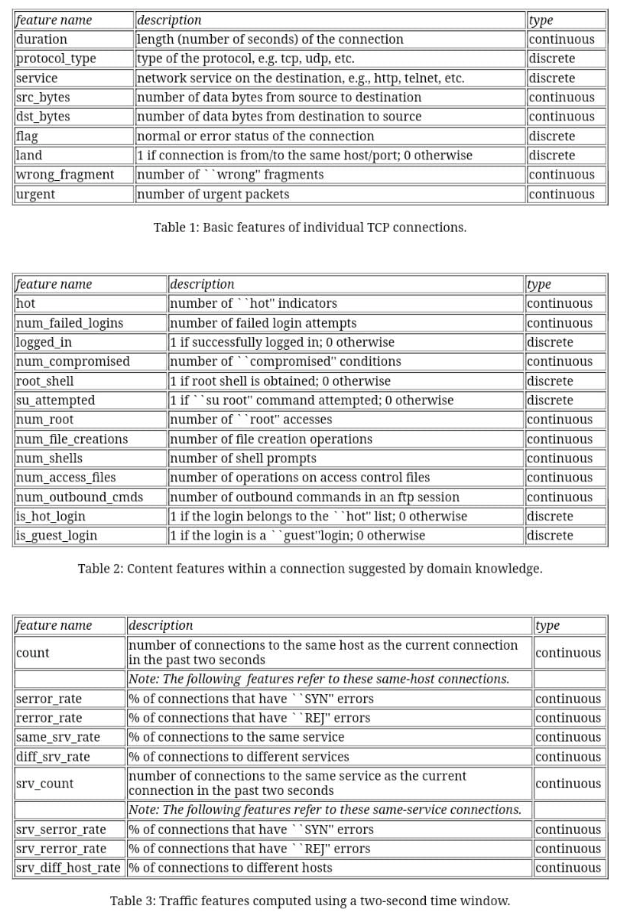

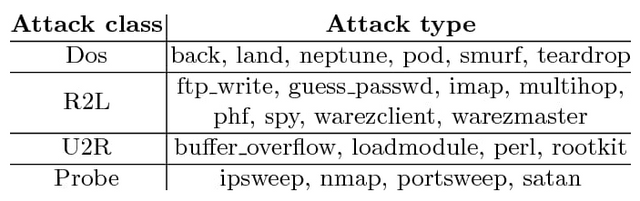